In [37]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph , START , END


# %%
class AgentState(TypedDict):
    number1: int
    number2: int
    final: str
    op1:str
    op2:str
    result:str



In [38]:
def subtract_node(state:AgentState) -> AgentState:
    """This is sub node"""
    state["final"] -= state["number1"] - state["number2"]
    return state

    

def add_node(state:AgentState) -> AgentState:
    """This is the add node of our sequence"""

    state["final"] += state["number1"] + state["number2"]
    return state
  
def decide_next1(state:AgentState):
  if(state["op1"] == '+'):
    return "add"
  else:
    return "subtract"
def decide_next2(state:AgentState):
  if(state["op2"] == '+'):
    return "add"
  else:
    return "subtract"
  
def router_node(state:AgentState)->AgentState:
  return state
  
  


In [39]:
graph = StateGraph(AgentState)

graph.add_node("add_node" , add_node)
graph.add_node("subtract_node" , subtract_node)
graph.add_node("next_add_node" , add_node)
graph.add_node("next_subtract_node" , subtract_node)
graph.add_node("router_node" , router_node)
graph.add_conditional_edges(START , decide_next1 ,{
  "add":"add_node",
  "subtract":"subtract_node"
})

graph.add_conditional_edges("router_node",decide_next2,{
   "add":"next_add_node",
  "subtract":"next_subtract_node"
})


graph.add_edge("add_node","router_node")
graph.add_edge("subtract_node","router_node")

graph.add_edge("next_add_node",END)
graph.add_edge("next_subtract_node",END)




app = graph.compile()



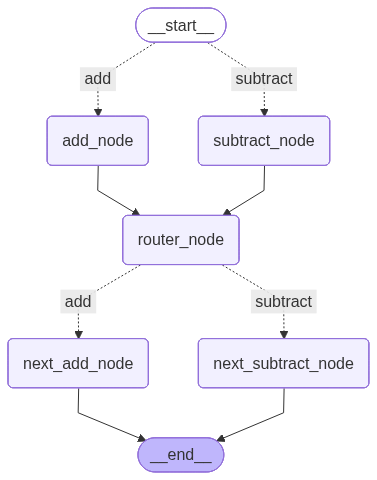

{'number1': 2, 'number2': 3, 'final': 10, 'op1': '+', 'op2': '+'}


In [42]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

# %%
result = app.invoke({"number1":2,"number2":3,"op1":"+","op2":"+" , "final":0})

# %%
print(result)